# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



In [1]:
import pandas as pd 
data = pd.read_csv('food_claims_2212.csv')
 

In [2]:
data.head

<bound method NDFrame.head of       claim_id  time_to_close  ... linked_cases      cause
0            1            317  ...        False    unknown
1            2            195  ...         True    unknown
2            3            183  ...         True       meat
3            4            186  ...        False       meat
4            5            138  ...        False  vegetable
...        ...            ...  ...          ...        ...
1995      1996            176  ...        False       meat
1996      1997            166  ...         True       meat
1997      1998            179  ...         True       meat
1998      1999            162  ...        False       meat
1999      2000            150  ...        False  vegetable

[2000 rows x 8 columns]>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [4]:
data.isnull().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

For every column in the data:
a. State whether the values match the description given in the table above.
b. State the number of missing values in the column.
c. Describe what you did to make values match the description if they did not match.

claim_id :
- a) the values match with the description
- b) no missung values .
- c) missing value are not possible ! 


time_to_close:
- a) the values match with the description 
- b) no missing values . 
- c) Replace missing values with the overall median time to close.

claim_amount:
- a) the values match with the description 
- b) no missing values
- c) remove the "R$ " symbol and convert the values to a numerical format (e.g., float) and replace missing values with the overall median claim amount.

amount_paid:
- a) the values match with the description 
- b) 36 values 
- c) Replace missing values with the overall median amount paid.

location:
- a) the values match with the description 
- b) no missing values
- c) Remove missing values.

linked_cases: 
- a) the values match with the description 
- b) 26 values 
- c) Replace missing values with FALSE.

cause :
- a) the values match with the description  
- b) no missing values
- c) Replace missing values with ‘unknown’.



In [5]:
overall_median = data["amount_paid"].median()
data["amount_paid"].fillna(overall_median, inplace=True)

In [6]:
data["amount_paid"]
data.isnull().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid              0
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [7]:
data["linked_cases"].fillna(False,inplace=True)

In [8]:
data.isnull().sum()

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

## Task 2

2. Create a visualization that shows the number of claims in each location. Use the visualization to:

- a. State which category of the variable location has the most observations
- b. Explain whether the observations are balanced across categories of the variable location

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
columns_to_keep = ['location', 'claim_amount'] 
visual = data[columns_to_keep]
print(visual)

       location claim_amount
0        RECIFE  R$ 74474.55
1     FORTALEZA  R$ 52137.83
2      SAO LUIS   R$ 24447.2
3     FORTALEZA  R$ 29006.28
4        RECIFE   R$ 19520.6
...         ...          ...
1995     RECIFE   R$ 28982.3
1996  FORTALEZA   R$ 5188.44
1997     RECIFE  R$ 11975.85
1998     RECIFE  R$ 23516.28
1999     RECIFE    R$ 8051.4

[2000 rows x 2 columns]


To sum or count the total of claims so I need to remove R$

In [11]:
visual = visual.sort_values(by=['location', 'claim_amount'])
visual['claim_amount'] = visual['claim_amount'].str.replace('R\$', '').str.replace(',', '').astype(float)
 

In [12]:
visual['claim_amount']

945     10175.96
1746    10997.94
767     11138.37
877     11170.39
686     11573.05
          ...   
856      9850.57
608      9884.24
1327     9890.84
372      9896.81
991      9921.05
Name: claim_amount, Length: 2000, dtype: float64

In [13]:

location_counts = visual['location'].value_counts()
# Get the category with the most observations
most_observed_location = location_counts.idxmax()
most_observed_count = location_counts.max()

print(f"The category with the most observations is '{most_observed_location}' with {most_observed_count} observations.")

The category with the most observations is 'RECIFE' with 885 observations.


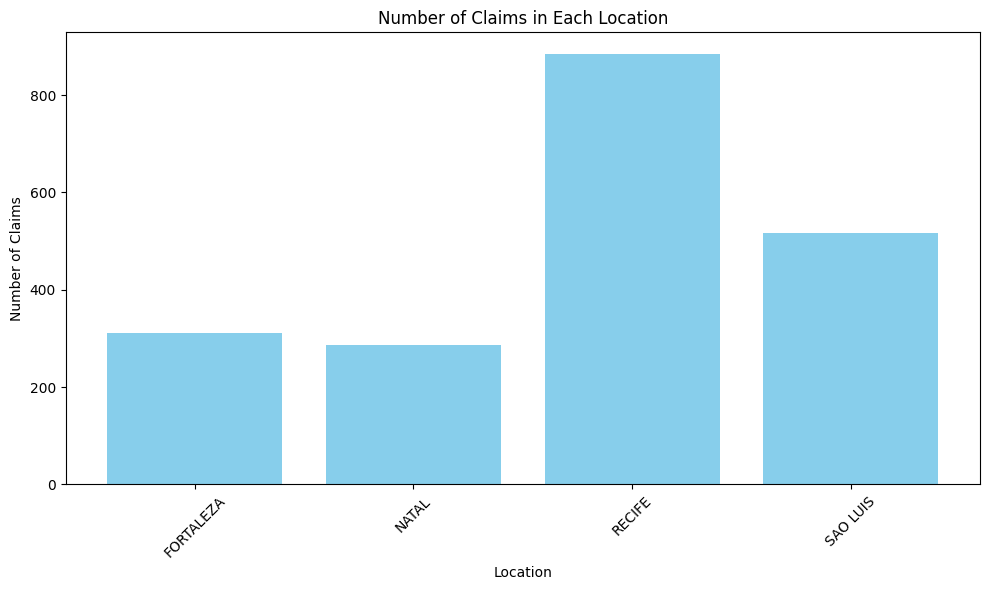

In [14]:
# Calculate summary statistics for claim_amount within each location category
location_stats = visual.groupby('location')['claim_amount'].describe()
# Create a bar chart to visualize the distribution of claim_amount across locations
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(location_stats.index, location_stats['count'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Number of Claims')
plt.title('Number of Claims in Each Location')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



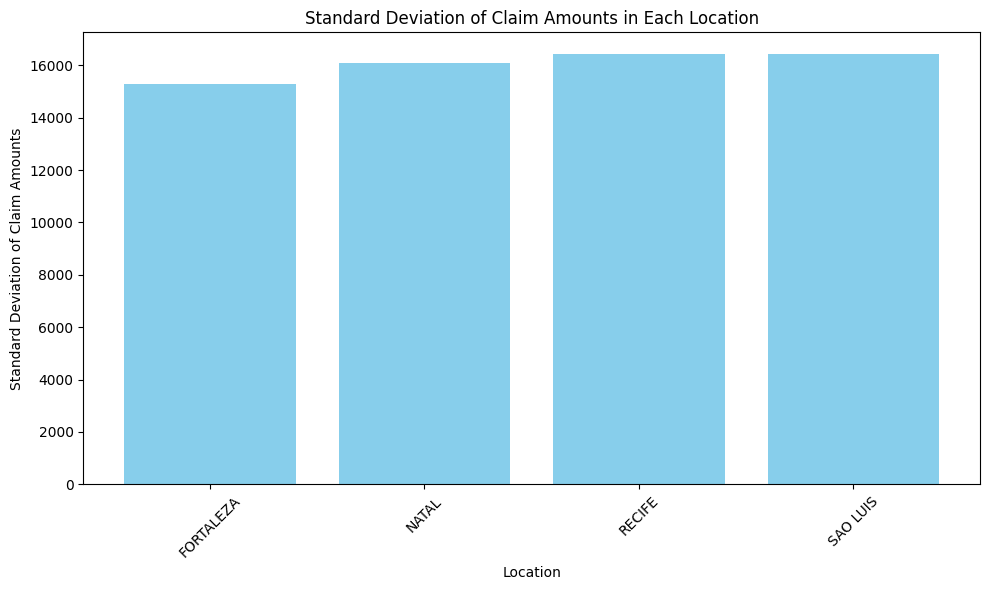

In [15]:

# Calculate standard deviation of claim amounts within each location
location_std = visual.groupby('location')['claim_amount'].std()

# Create a bar chart to visualize the standard deviation of claim amounts
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(location_std.index, location_std.values, color='skyblue')
plt.xlabel('Location')
plt.ylabel('Standard Deviation of Claim Amounts')
plt.title('Standard Deviation of Claim Amounts in Each Location')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [16]:
# Calculate standard deviation of claim amounts within each location
location_std = visual.groupby('location')['claim_amount'].std()

average_std = location_std.mean()

# Define a threshold for considering standard deviations as similar
threshold = 0.1  # Adjust this threshold as needed

# Check if all standard deviations are within the threshold of the average
balanced = all(abs(location_std - average_std) < threshold)

if balanced:
    print("The observations are balanced across locations based on claim_amount standard deviation.")
else:
    print("The observations are not balanced across locations based on claim_amount standard deviation.")

The observations are not balanced across locations based on claim_amount standard deviation.


## Task 3

3. Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

In [17]:
time_to_close = data['time_to_close'] 


Text(0, -60, 'Time to Close (Days)')

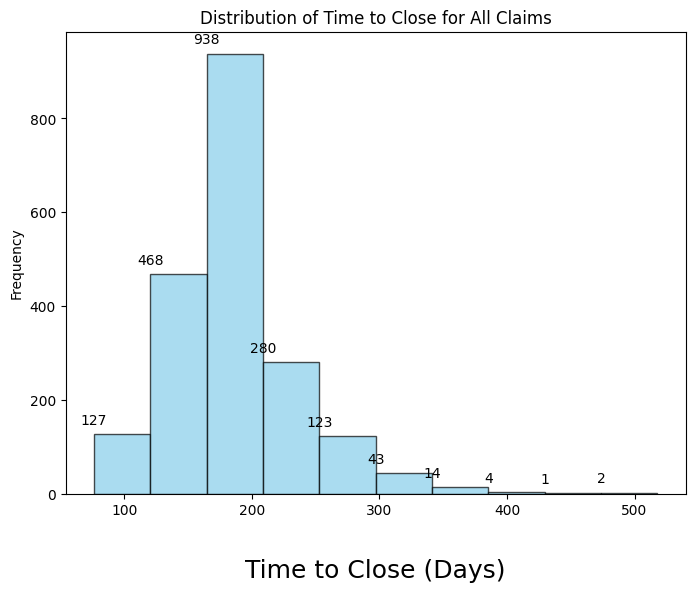

In [18]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
n, bins, patches = plt.hist(time_to_close, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

plt.ylabel('Frequency')
plt.title('Distribution of Time to Close for All Claims')

# Annotate each bar with the count
for count, bin, patch in zip(n, bins, patches):
    plt.annotate(str(int(count)), xy=(bin, count), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')



plt.annotate("Time to Close (Days)", xy=(bins[len(bins) // 2], 0), xytext=(0, -60), textcoords='offset points', ha='center', fontsize=18)




In [19]:
import numpy as np 
time_to_close_values = data['time_to_close'].values

# Calculate statistical measures
mean_time_to_close = np.mean(time_to_close_values)
median_time_to_close = np.median(time_to_close_values)
std_time_to_close = np.std(time_to_close_values)
min_time_to_close = np.min(time_to_close_values)
max_time_to_close = np.max(time_to_close_values)
range_time_to_close = max_time_to_close - min_time_to_close

# Print detailed information about the distribution
print(f"Number of Data Points: {len(time_to_close_values)}")
print(f"Mean Time to Close: {mean_time_to_close}")
print(f"Median Time to Close: {median_time_to_close}")
print(f"Standard Deviation: {std_time_to_close}")
print(f"Minimum Time to Close: {min_time_to_close}")
print(f"Maximum Time to Close: {max_time_to_close}")
print(f"Range of Time to Close: {range_time_to_close}")


# Calculate statistical measures
mean_time_to_close = data['time_to_close'].mean()
median_time_to_close = data['time_to_close'].median()
min_time_to_close = data['time_to_close'].min()

# Determine which measure represents the largest distribution
largest_distribution = ""

if mean_time_to_close > median_time_to_close and mean_time_to_close > min_time_to_close:
    largest_distribution = "Mean"
elif median_time_to_close > mean_time_to_close and median_time_to_close > min_time_to_close:
    largest_distribution = "Median"
else:
    largest_distribution = "Minimum Value"

print(f"The largest distribution is represented by: {largest_distribution}")

Number of Data Points: 2000
Mean Time to Close: 185.568
Median Time to Close: 179.0
Standard Deviation: 49.15109740382203
Minimum Time to Close: 76
Maximum Time to Close: 518
Range of Time to Close: 442
The largest distribution is represented by: Mean


The distribution most found around >150 to 210-220 and rarely to found in >350

## Task 4


4. Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.


In [20]:

# Calculate the correlation for each location separately
locations = data['location'].unique()
correlations_by_location = {}

for location in locations:
    subset = data[data['location'] == location]
    correlation = subset['time_to_close'].corr(subset['time_to_close'])
    correlations_by_location[location] = correlation

# Display the correlations for each location
for location, correlation in correlations_by_location.items():
    print(f"Correlation in {location}: {correlation}")

Correlation in RECIFE: 1.0
Correlation in FORTALEZA: 1.0
Correlation in SAO LUIS: 1.0
Correlation in NATAL: 1.0


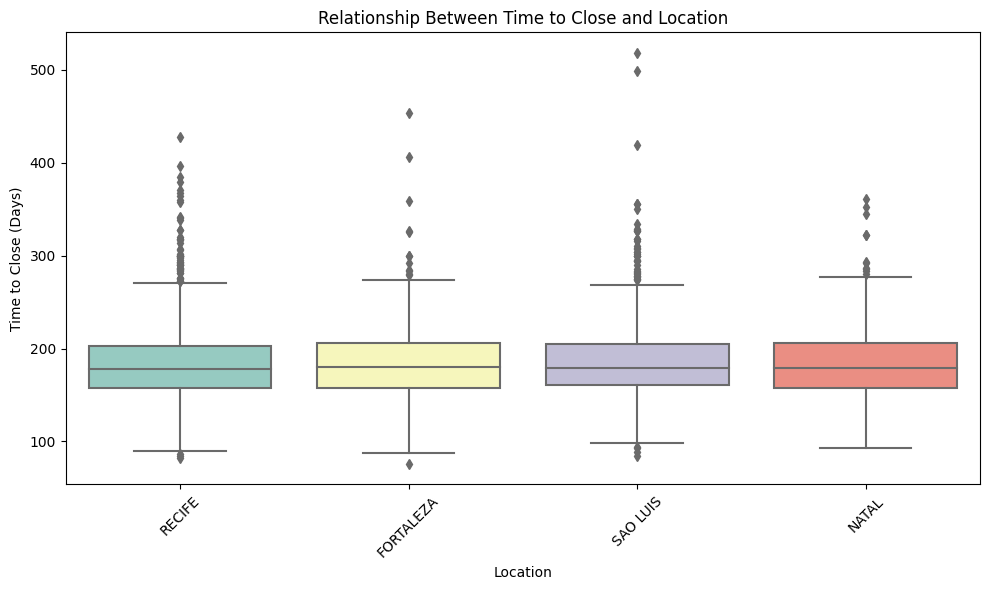

In [21]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)  
sns.boxplot(x='location', y='time_to_close', data=data, palette='Set3')
plt.xlabel('Location')
plt.ylabel('Time to Close (Days)')
plt.title('Relationship Between Time to Close and Location')


plt.tight_layout()
plt.show()


from the correration I found that every locations got the correlation with time to close is  1.0  . 
so I visualize as the box plot to see in details about each location and I found that every locations got upper outlier espeacially with sao luis that there're some of its outlier higher than other with time to close about 500 days .
More over Natal is only one location that doesn't have lower outlier . 

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam